<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/Caleb_Monroe_Project_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf #importing yahoo finance / other tools and renaming
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
cutoff_date = '2024-03-06' #establishing a cutoff date so that data does not vary

In [ ]:
MARA = yf.Ticker("MARA") #calling specific ticker symbol

In [ ]:
MARA = MARA.history(start='2017-01-02', end=cutoff_date)

In [ ]:
MARA #printing for visualization purposes

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03 00:00:00-05:00,25.440001,29.760000,25.440001,28.639999,5144,0.0,0.0
2017-01-04 00:00:00-05:00,29.440001,29.920000,28.000000,29.440001,3075,0.0,0.0
2017-01-05 00:00:00-05:00,29.600000,32.959999,29.600000,32.799999,7631,0.0,0.0
2017-01-06 00:00:00-05:00,32.000000,33.439999,29.280001,30.400000,6675,0.0,0.0
2017-01-09 00:00:00-05:00,30.400000,30.400000,29.600000,30.400000,4463,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,32.299999,34.090000,29.469999,31.030001,179649700,0.0,0.0
2024-02-29 00:00:00-05:00,29.770000,30.709999,25.059999,25.900000,133154400,0.0,0.0
2024-03-01 00:00:00-05:00,26.530001,27.000000,24.520000,27.000000,78103500,0.0,0.0


In [ ]:
print(MARA.columns)#printing columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [ ]:
drop_columns = ['Dividends', 'Stock Splits']#dropping unneeded columns from the data frame
MARA_df = MARA.drop(columns=drop_columns)

In [ ]:
MARA_df #printing new dataframe to ensure everything looks good

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03 00:00:00-05:00,25.440001,29.760000,25.440001,28.639999,5144
2017-01-04 00:00:00-05:00,29.440001,29.920000,28.000000,29.440001,3075
2017-01-05 00:00:00-05:00,29.600000,32.959999,29.600000,32.799999,7631
2017-01-06 00:00:00-05:00,32.000000,33.439999,29.280001,30.400000,6675
2017-01-09 00:00:00-05:00,30.400000,30.400000,29.600000,30.400000,4463
...,...,...,...,...,...
2024-02-28 00:00:00-05:00,32.299999,34.090000,29.469999,31.030001,179649700
2024-02-29 00:00:00-05:00,29.770000,30.709999,25.059999,25.900000,133154400
2024-03-01 00:00:00-05:00,26.530001,27.000000,24.520000,27.000000,78103500


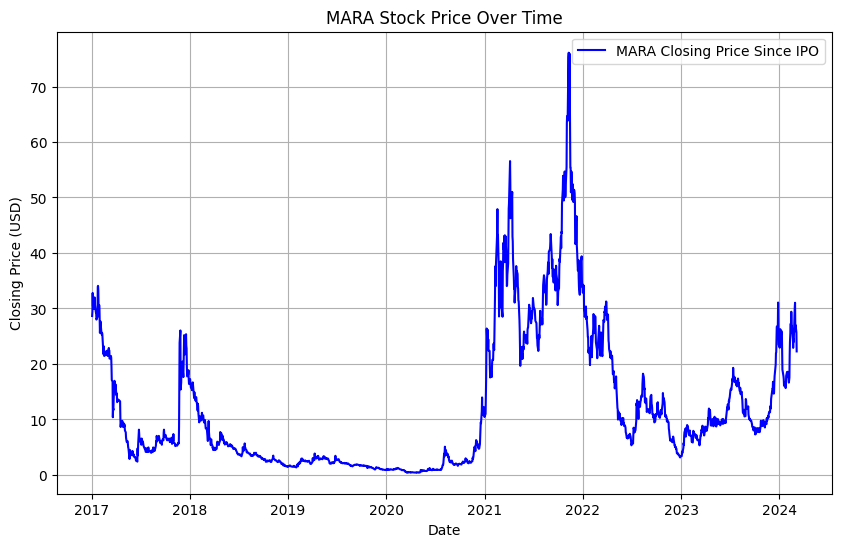

In [ ]:
plt.figure(figsize=(10, 6)) #making a plot of MARA price over time since 2017
plt.plot(MARA['Close'], label='MARA Closing Price Since IPO', color='blue')
plt.title('MARA Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
MARA_df['Tomorrows Closing Price'] = MARA_df['Close'].shift(-1) #creation of closing price and price increase? columns
MARA_df['Price Increase?'] = (MARA_df['Tomorrows Closing Price'] > MARA_df['Close']).astype(int)
MARA_df

,Open,High,Low,Close,Volume,Tomorrows Closing Price,Price Increase?
Date,,,,,,,
2017-01-03 00:00:00-05:00,25.440001,29.760000,25.440001,28.639999,5144,29.440001,1
2017-01-04 00:00:00-05:00,29.440001,29.920000,28.000000,29.440001,3075,32.799999,1
2017-01-05 00:00:00-05:00,29.600000,32.959999,29.600000,32.799999,7631,30.400000,0
2017-01-06 00:00:00-05:00,32.000000,33.439999,29.280001,30.400000,6675,30.400000,0
2017-01-09 00:00:00-05:00,30.400000,30.400000,29.600000,30.400000,4463,29.920000,0
...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,32.299999,34.090000,29.469999,31.030001,179649700,25.900000,0
2024-02-29 00:00:00-05:00,29.770000,30.709999,25.059999,25.900000,133154400,27.000000,1
2024-03-01 00:00:00-05:00,26.530001,27.000000,24.520000,27.000000,78103500,25.709999,0


In [ ]:
MARA_df.columns #checking columns again

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrows Closing Price',
       'Price Increase?'],
      dtype='object')

# Initial logistic regression test using current given features

In [ ]:
X = MARA_df[['Open','High', 'Low', 'Close', 'Volume']] #defining X and y using features and target variable created above
y = MARA_df['Price Increase?']

X = X[:-1]
y = y[:-1] #dropping last rows in each in order to avoid errors with NAN values

scaler = StandardScaler()#rescaling variables as some are drastically different than others
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #train-test split

model = LogisticRegression() # defining logistic regression
model.fit(X_train, y_train) # fitting model

y_pred = model.predict(X_test) #predicting off X

print("Classification Report:")#printing report and scores
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       206
           1       0.41      0.08      0.14       155

    accuracy                           0.55       361
   macro avg       0.49      0.50      0.42       361
weighted avg       0.50      0.55      0.46       361

Accuracy Score: 0.554016620498615


In [ ]:
precision = precision_score(y_test, y_pred) #rechecking and printing more precise precision score

print("Precision Score:", precision)

Precision Score: 0.40625


In [ ]:
MARA_df['Price Increase?'].value_counts() / 1804 #finding value counts of actual price data then converting to percentages

0    0.57816
1    0.42184
Name: Price Increase?, dtype: float64

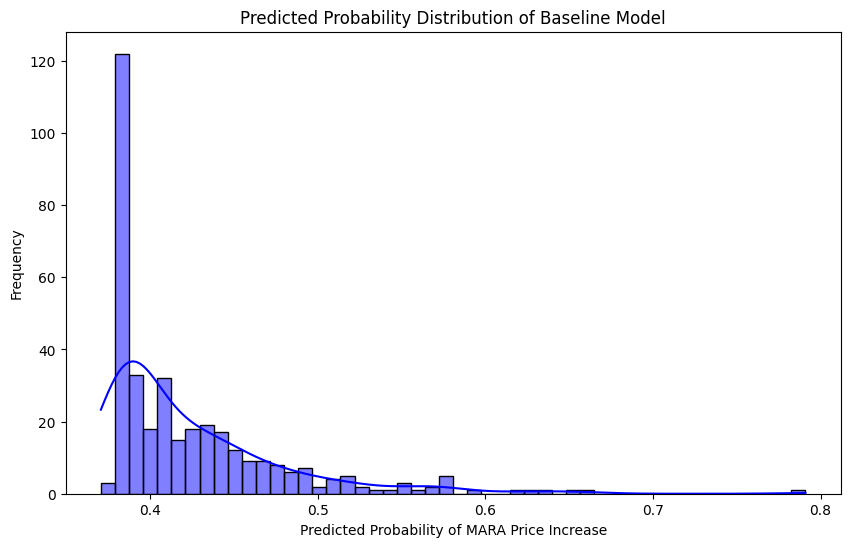

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]#finding predicted probabilities in order to visualize

#skewed right towards lower probabilities
plt.figure(figsize=(10, 6))#Plotting results in a histogram with a curve shown on the bins
bin_range = (0, 1)
sns.histplot(y_pred_prob, kde=True, bins=50, color='blue')
plt.title('Predicted Probability Distribution of Baseline Model')
plt.xlabel('Predicted Probability of MARA Price Increase')
plt.ylabel('Frequency')
plt.show()

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42) #conducting random forest test
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
mse = mean_squared_error(y_test, random_forest_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.29553711911357344


In [ ]:
y_train_pred = model.predict(X_scaled)
MSE = mean_squared_error(y, y_train_pred) #defining MSE score
RMSE = np.sqrt(MSE) #defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_scaled; model_yn = y #defining each model to be used in the fit
log_reg = make_pipeline(model) #defining pipeline
log_reg.fit(model_xn, model_yn) #lin reg fit
logreg_rmses = -cross_val_score(log_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:") #finding and printing cross validation scores
pd.Series(logreg_rmses).describe() #printing stats for cross validation

The RMSE of this model is: 0.647962804407575
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.668957
std       0.037145
min       0.643712
25%       0.648438
50%       0.651012
75%       0.666667
max       0.760117
dtype: float64

# Creation of new features and subsequent tests for secondary models

In [ ]:
periods = [2,5,60,250] #establishing time frames that we want to analyze new features on (2 days, 1 week, about 1 trading period, and about 1 year)
new_predictors= []

for period in periods: #creating loop for creation of "Close Ratio and "recent trand columns
  rolling_averages = MARA.rolling(period).mean()
  new_ratios = f"Close Ratio_{period}"
  MARA_df[new_ratios] = MARA_df["Close"] / rolling_averages["Close"] #creation of close ratio column
  recent_trend = f"recent_trend_{period}"
  MARA_df[recent_trend] = MARA_df.shift(1).rolling(period).sum()["Price Increase?"]
  new_predictors += [new_ratios, recent_trend] #creation of recent trend column
MARA_df = MARA_df.dropna() #dropping rows with NAN
MARA_df

,Open,High,Low,Close,Volume,Tomorrows Closing Price,Price Increase?,Close Ratio_2,recent_trend_2,Close Ratio_5,recent_trend_5,Close Ratio_60,recent_trend_60,Close Ratio_250,recent_trend_250
Date,,,,,,,,,,,,,,,
2017-12-29 00:00:00-05:00,17.600000,17.719999,16.320000,16.400000,298600,17.280001,1,0.975030,0.0,0.927602,2.0,1.367198,24.0,1.379004,88.0
2018-01-02 00:00:00-05:00,16.400000,17.280001,15.560000,17.280001,504625,16.760000,0,1.026128,1.0,0.982712,3.0,1.419729,25.0,1.458967,88.0
2018-01-03 00:00:00-05:00,17.320000,18.520000,16.400000,16.760000,598675,16.280001,0,0.984724,1.0,0.968115,2.0,1.358038,25.0,1.422770,87.0
2018-01-04 00:00:00-05:00,16.639999,17.040001,16.040001,16.280001,302875,15.720000,0,0.985472,0.0,0.969509,1.0,1.301498,25.0,1.388680,87.0
2018-01-05 00:00:00-05:00,16.799999,17.080000,15.680000,15.720000,340325,15.560000,0,0.982500,0.0,0.953421,1.0,1.241575,24.0,1.347663,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-27 00:00:00-05:00,31.740000,32.869999,28.219999,30.309999,116889400,31.030001,1,1.018824,2.0,1.157312,3.0,1.447895,34.0,2.314058,124.0
2024-02-28 00:00:00-05:00,32.299999,34.090000,29.469999,31.030001,179649700,25.900000,0,1.011738,2.0,1.115545,4.0,1.460132,35.0,2.351420,125.0
2024-02-29 00:00:00-05:00,29.770000,30.709999,25.059999,25.900000,133154400,27.000000,1,0.909889,1.0,0.922233,3.0,1.207187,34.0,1.951059,125.0


In [ ]:
X = MARA_df[['Open','High', 'Low', 'Close', 'Volume', 'Close Ratio_2', 'Close Ratio_5', 'Close Ratio_60', 'Close Ratio_250', 'recent_trend_2', 'recent_trend_5', 'recent_trend_60', 'recent_trend_250']] #defining X and y using features and target variable created above
y = MARA_df['Price Increase?']

scaler = StandardScaler()#rescaling variables as some are drastically different than others
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #train-test split

model = LogisticRegression() # defining logistic regression
model.fit(X_train, y_train) # fitting model

y_pred = model.predict(X_test) #predicting off X

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.95      0.69       167
           1       0.61      0.10      0.17       144

    accuracy                           0.55       311
   macro avg       0.58      0.52      0.43       311
weighted avg       0.58      0.55      0.45       311

Accuracy Score: 0.5530546623794212


In [ ]:
precision = precision_score(y_test, y_pred) #calculating precision score separately to find specific decimal

print("Precision Score:", precision) # Print precision score

Precision Score: 0.6086956521739131


In [ ]:
MARA_df['Price Increase?'].value_counts() / 1303 #Finding value counts of percentage of actual results

0    0.675365
1    0.516500
Name: Price Increase?, dtype: float64

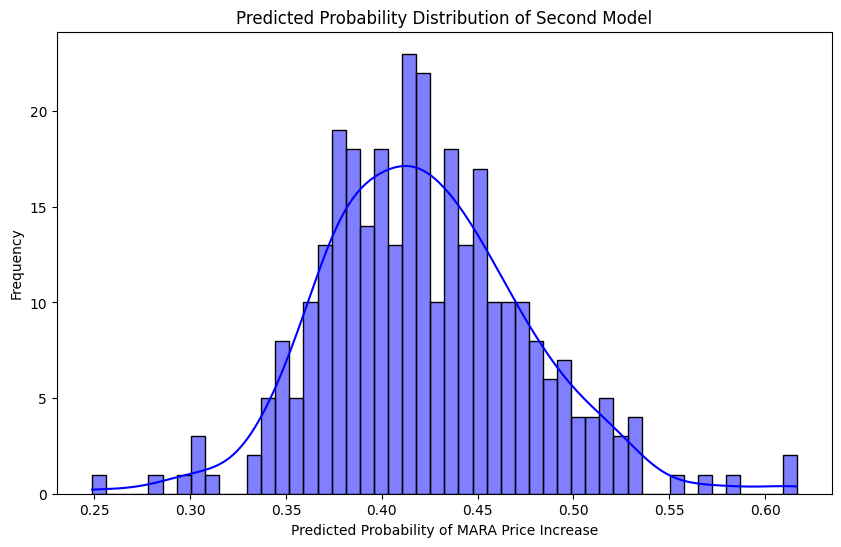

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1] #finding predicted probabilities in order to visualize
#more normal shape, model becoming more confident

plt.figure(figsize=(10, 6)) #Plotting results in a histogram with a curve shown on the bins
sns.histplot(y_pred_prob, kde=True, bins=50, color='blue')
plt.title('Predicted Probability Distribution of Second Model')
plt.xlabel('Predicted Probability of MARA Price Increase')
plt.ylabel('Frequency')
plt.show()

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
mse = mean_squared_error(y_test, random_forest_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.26971254019292606


In [ ]:
y_train_pred = model.predict(X_scaled)
MSE = mean_squared_error(y, y_train_pred) #defining MSE score
RMSE = np.sqrt(MSE) #defining RMSE score
print("The RMSE of this model is: {}".format(RMSE))#printing RMSE

model_xn = X_scaled; model_yn = y #defining each model to be used in the fit
log_reg = make_pipeline(model) #defining pipeline
log_reg.fit(model_xn, model_yn) #lin reg fit
logreg_rmses = -cross_val_score(log_reg, model_xn, model_yn, scoring="neg_root_mean_squared_error", cv=10)
print("The cross validation results for this model's RMSE score are:") #finding and printing cross validation scores
pd.Series(logreg_rmses).describe() #printing stats for cross validation

The RMSE of this model is: 0.6519078938967678
The cross validation results for this model's RMSE score are:


count    10.000000
mean      0.730439
std       0.091616
min       0.655353
25%       0.660757
50%       0.709326
75%       0.744720
max       0.933257
dtype: float64